In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import os

In [4]:
for expression in os.listdir( "drive/MyDrive/Colab Notebooks/Data/train/"):
    print(str(len(os.listdir( "drive/MyDrive/Colab Notebooks/Data/train/" + expression))) + " " + expression + " images")

3171 surprise images
4830 sad images
4965 neutral images
7214 happy images
4097 fear images
436 disgust images
3995 angry images


In [5]:
# Constants
img_size = 48
batch_size = 64
num_classes = 7

# Data augmentation
train_datagen = ImageDataGenerator(horizontal_flip=True)

validation_datagen = ImageDataGenerator(horizontal_flip=True)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    "drive/MyDrive/Colab Notebooks/Data/train/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    "drive/MyDrive/Colab Notebooks/Data/test/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,BatchNormalization


# Create the CNN model
model = Sequential()

#convolutional layer block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(img_size, img_size, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the input
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [17]:
# Train the model
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)


model_history= model.fit(   
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = [reduce_lr]
    
    )


Epoch 1/50
448/448 [==============================] - 36s 76ms/step - loss: 2.4124 - accuracy: 0.1961 - val_loss: 1.8469 - val_accuracy: 0.2616 - lr: 5.0000e-04
Epoch 2/50
448/448 [==============================] - 33s 74ms/step - loss: 1.8909 - accuracy: 0.2956 - val_loss: 1.6253 - val_accuracy: 0.3824 - lr: 5.0000e-04
Epoch 3/50
448/448 [==============================] - 33s 74ms/step - loss: 1.6373 - accuracy: 0.3951 - val_loss: 1.4707 - val_accuracy: 0.4263 - lr: 5.0000e-04
Epoch 4/50
448/448 [==============================] - 33s 74ms/step - loss: 1.4885 - accuracy: 0.4403 - val_loss: 1.3469 - val_accuracy: 0.4869 - lr: 5.0000e-04
Epoch 5/50
448/448 [==============================] - 33s 74ms/step - loss: 1.3618 - accuracy: 0.4773 - val_loss: 1.2978 - val_accuracy: 0.4986 - lr: 5.0000e-04
Epoch 6/50
448/448 [==============================] - 33s 74ms/step - loss: 1.2812 - accuracy: 0.5146 - val_loss: 1.1921 - val_accuracy: 0.5494 - lr: 5.0000e-04
Epoch 7/50
448/448 [==============

In [18]:
model_accuracy = model.evaluate(validation_generator)
print("model_accuracy : ",model_accuracy)

113/113 [==============================] - 7s 58ms/step - loss: 1.0368 - accuracy: 0.6682
model_accuracy :  [1.0367751121520996, 0.6681526899337769]


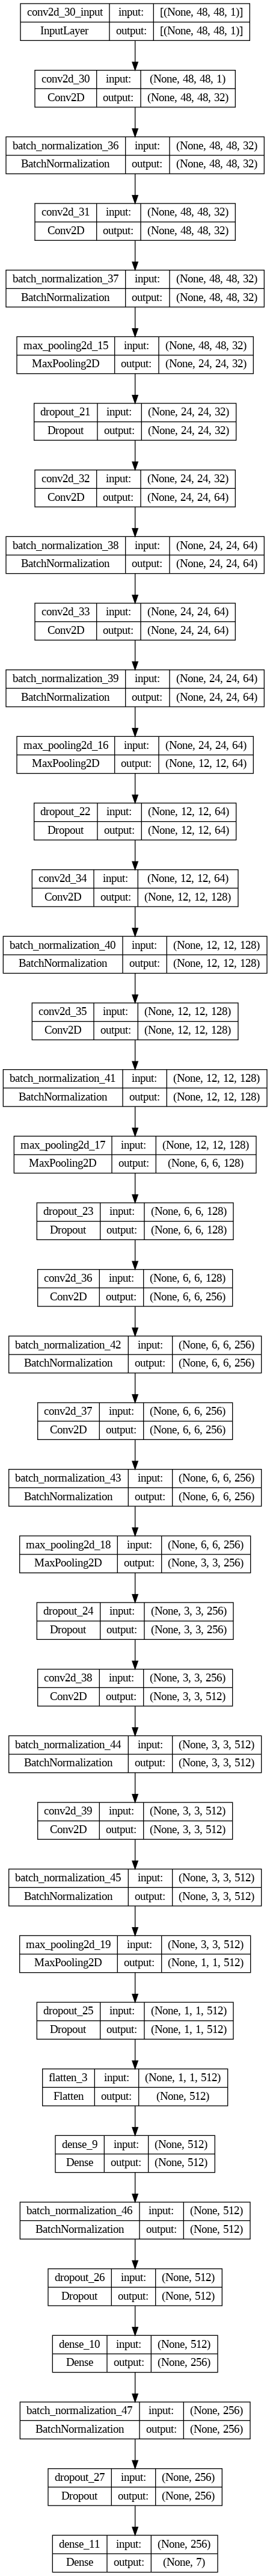

In [19]:
from keras.utils import plot_model
from IPython.display import SVG, Image
plot_model(model, to_file='model_layer-10.png', show_shapes=True, show_layer_names=True)

Image('model_layer-10.png',width=1080, height=800)

In [20]:
model_json = model.to_json()
with open("Model_layer-10.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model.save_weights('ModelWeight_layer-10.h5')

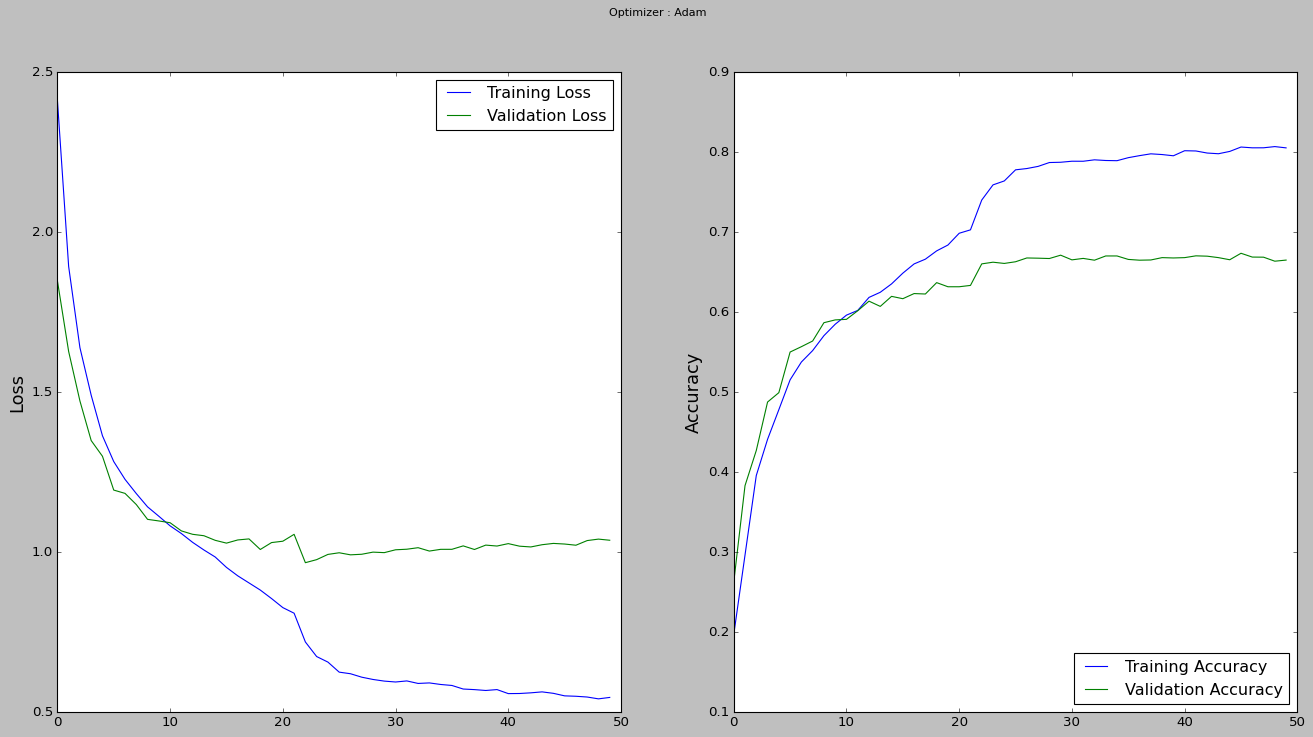

In [21]:
import matplotlib.pyplot as plt
plt.style.use('classic')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()